In [1]:
#From SAV to LOVE

# HW №1


## Path №1

In [2]:
!pip3 install torch torchvision

In [3]:
pip show torch

Name: torch
Version: 1.7.0+cu101
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.7/dist-packages
Requires: typing-extensions, future, numpy, dataclasses
Required-by: torchvision, torchtext, fastai


In [4]:
pip show torchvision

Name: torchvision
Version: 0.8.1+cu101
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: torch, numpy, pillow
Required-by: fastai


In [5]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [6]:
import torch
import torchvision
import numpy as np
from torch.autograd import Variable
from torch import nn 
from torch import optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt ### воспользуемся для отображения изображения

In [7]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Normalize the test set same as training set without augmentation
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

In [8]:
train_dataset = torchvision.datasets.CIFAR10(root='C:/Users/79811/Videos/datasciense/pyTorch/data/', # путь куда будут скачиваться наши данные(если download=true), 
                                                                 # или где лежат наши данные(dowload=False)
                                             train=True, # говорим что используем датасет для обучения  
                                             transform=transforms.ToTensor(), # важная строчка: здесь мы преобразуем данные
                                                                                # из датасета в формат тензоров из торч
                                             download=True)


image, label = train_dataset[0]
print (image.size())
print (label)

Files already downloaded and verified
torch.Size([3, 32, 32])
6


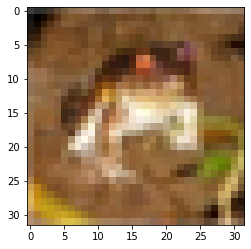

In [9]:
plt.imshow(image.permute(1, 2, 0).numpy())

## **USE GPU**

In [10]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [11]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=32, 
                                           shuffle=True)

In [12]:
test_dataset = torchvision.datasets.CIFAR10(root='C:/Users/79811/Videos/datasciense/pyTorch/data/', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1,
                                         shuffle=False)

Files already downloaded and verified


In [13]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

## **create model**

In [14]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layer = nn.Sequential(

            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0.05),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )


        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0.1),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        # conv layers
        x = self.conv_layer(x)
        
        # flatten
        x = x.view(x.size(0), -1)
        
        # fc layer
        x = self.fc_layer(x)
        return x



net = Net().to(device)

In [15]:
net

Net(
  (conv_layer): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Dropout2d(p=0.05, inplace=False)
    (13): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stat

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

## **teach model**

In [17]:
for epoch in range(16):  # 16 эпох 
    running_loss = 0.0 # Для вывода процесса обучения
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        # Обнуляем градиент
        optimizer.zero_grad()
    
        # Делаем предсказание
        outputs = net(inputs)
        # Рассчитываем лосс-функцию
        loss = criterion(outputs, labels)
        # Делаем шаг назад по лоссу
        loss.backward()
        # Делаем шаг нашего оптимайзера
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        m = 300
        if i % m == 0:    # печатаем каждые 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / m))
            running_loss = 0.0

print('Training is finished!')

[1,     1] loss: 0.008
[1,   301] loss: 1.828
[1,   601] loss: 1.564
[1,   901] loss: 1.432
[1,  1201] loss: 1.298
[1,  1501] loss: 1.227
[2,     1] loss: 0.004
[2,   301] loss: 1.126
[2,   601] loss: 1.061
[2,   901] loss: 1.037
[2,  1201] loss: 0.980
[2,  1501] loss: 0.936
[3,     1] loss: 0.003
[3,   301] loss: 0.879
[3,   601] loss: 0.842
[3,   901] loss: 0.840
[3,  1201] loss: 0.833
[3,  1501] loss: 0.818
[4,     1] loss: 0.003
[4,   301] loss: 0.742
[4,   601] loss: 0.738
[4,   901] loss: 0.723
[4,  1201] loss: 0.716
[4,  1501] loss: 0.731
[5,     1] loss: 0.001
[5,   301] loss: 0.639
[5,   601] loss: 0.654
[5,   901] loss: 0.643
[5,  1201] loss: 0.651
[5,  1501] loss: 0.647
[6,     1] loss: 0.002
[6,   301] loss: 0.558
[6,   601] loss: 0.579
[6,   901] loss: 0.595
[6,  1201] loss: 0.571
[6,  1501] loss: 0.578
[7,     1] loss: 0.001
[7,   301] loss: 0.518
[7,   601] loss: 0.525
[7,   901] loss: 0.528
[7,  1201] loss: 0.544
[7,  1501] loss: 0.532
[8,     1] loss: 0.001
[8,   301] 

## **save model**

In [18]:
PATH = './cifar_net_version_test_intro.pth'
torch.save(net.state_dict(), PATH)

In [19]:

print("Model state_dict: ")
for param in net.state_dict():
    print(param," \ ", net.state_dict()[param].size())

Model state_dict: 
conv_layer.0.weight  \  torch.Size([32, 3, 3, 3])
conv_layer.0.bias  \  torch.Size([32])
conv_layer.1.weight  \  torch.Size([32])
conv_layer.1.bias  \  torch.Size([32])
conv_layer.1.running_mean  \  torch.Size([32])
conv_layer.1.running_var  \  torch.Size([32])
conv_layer.1.num_batches_tracked  \  torch.Size([])
conv_layer.3.weight  \  torch.Size([64, 32, 3, 3])
conv_layer.3.bias  \  torch.Size([64])
conv_layer.6.weight  \  torch.Size([128, 64, 3, 3])
conv_layer.6.bias  \  torch.Size([128])
conv_layer.7.weight  \  torch.Size([128])
conv_layer.7.bias  \  torch.Size([128])
conv_layer.7.running_mean  \  torch.Size([128])
conv_layer.7.running_var  \  torch.Size([128])
conv_layer.7.num_batches_tracked  \  torch.Size([])
conv_layer.9.weight  \  torch.Size([128, 128, 3, 3])
conv_layer.9.bias  \  torch.Size([128])
conv_layer.13.weight  \  torch.Size([256, 128, 3, 3])
conv_layer.13.bias  \  torch.Size([256])
conv_layer.14.weight  \  torch.Size([256])
conv_layer.14.bias  \  to

## **download model**

In [30]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

## **Use model**

In [31]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

GroundTruth:    cat


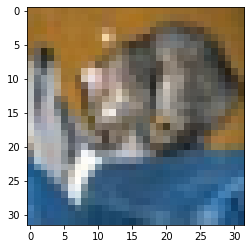

In [32]:
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.imshow(imgs.permute(1, 2, 0).numpy())
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(1)))

In [29]:
sum = 0
max = 0
for i, data in enumerate(test_loader, 0):
    inputs, labels = data[0].to(device), data[1]
    outputs = net(inputs)
    _, predicted = torch.max(outputs, 1)
    predicted = predicted.to('cpu')
    if labels.numpy()[0] == predicted.numpy()[0]:
      sum += 1
    max += 1

print(sum/max)

0.6868


## Path №2

In [33]:
import tensorflow as tf 

In [34]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [35]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [36]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.09765229,  0.35217553,  0.23341143, -0.03815803, -0.24514356,
         0.22035423, -0.47106296,  0.10108556, -0.19360109, -0.02632517]],
      dtype=float32)

In [37]:
tf.nn.softmax(predictions).numpy()

array([[0.08968824, 0.14063495, 0.12488626, 0.0951861 , 0.07738929,
        0.12326619, 0.06173981, 0.10940728, 0.08148272, 0.09631912]],
      dtype=float32)

In [38]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [39]:
loss_fn(y_train[:1], predictions).numpy()

2.093409

In [40]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [41]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4751 - accuracy: 0.8620
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1445 - accuracy: 0.9559
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1088 - accuracy: 0.9676
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0863 - accuracy: 0.9734
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0716 - accuracy: 0.9771


In [42]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0739 - accuracy: 0.9785


[0.07390621304512024, 0.9785000085830688]

In [43]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [44]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[6.0940128e-09, 2.5339421e-08, 2.8156780e-06, 3.3609197e-04,
        1.2181645e-11, 9.2501431e-08, 4.2570127e-15, 9.9965417e-01,
        1.5525622e-07, 6.6591092e-06],
       [2.0200353e-09, 8.4793137e-06, 9.9998498e-01, 3.8268572e-06,
        5.3247202e-14, 2.5979123e-06, 1.4471057e-09, 5.1860385e-14,
        7.1056064e-08, 6.3181229e-15],
       [6.8064949e-08, 9.9972755e-01, 2.2397720e-05, 2.9916890e-05,
        4.0273128e-05, 4.8709976e-06, 3.2125328e-05, 9.9888020e-05,
        4.2429660e-05, 4.0173700e-07],
       [9.9977165e-01, 1.7517032e-09, 7.5281045e-05, 3.3078672e-06,
        3.7213475e-05, 5.0360227e-06, 4.0624203e-05, 3.1523534e-05,
        1.5656955e-08, 3.5371850e-05],
       [3.1223947e-06, 1.4285429e-08, 4.6479752e-05, 2.1778357e-08,
        9.9376351e-01, 3.6607488e-09, 8.5375319e-08, 5.9457354e-05,
        1.1011344e-06, 6.1262157e-03]], dtype=float32)>